Tabla Diferencia Finita
[['i', 'xi', 'fi', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13']]
[[ 0.000e+00  1.000e+00  0.000e+00  2.500e+01 -5.000e+01  1.090e+02
  -2.100e+02  3.600e+02 -5.750e+02  9.000e+02 -1.439e+03  2.376e+03
  -3.928e+03  6.108e+03 -8.088e+03  0.000e+00]
 [ 1.000e+00  2.000e+00  2.500e+01 -2.500e+01  5.900e+01 -1.010e+02
   1.500e+02 -2.150e+02  3.250e+02 -5.390e+02  9.370e+02 -1.552e+03
   2.180e+03 -1.980e+03  0.000e+00  0.000e+00]
 [ 2.000e+00  3.000e+00  0.000e+00  3.400e+01 -4.200e+01  4.900e+01
  -6.500e+01  1.100e+02 -2.140e+02  3.980e+02 -6.150e+02  6.280e+02
   2.000e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 3.000e+00  4.000e+00  3.400e+01 -8.000e+00  7.000e+00 -1.600e+01
   4.500e+01 -1.040e+02  1.840e+02 -2.170e+02  1.300e+01  8.280e+02
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 4.000e+00  5.000e+00  2.600e+01 -1.000e+00 -9.000e+00  2.900e+01
  -5.900e+01  8.000e+01 -3.300e+01 -2.040e+02  8.410e+02  0.0

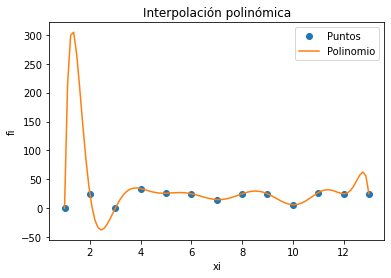

In [2]:
# Polinomio interpolación
# Diferencias finitas avanzadas
# Tarea: Verificar tamaño de vectores,
#        verificar puntos equidistantes en x

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
fi = np.array([0,25,0,34,26,25,15,25,25,6,27,25,25])

# PROCEDIMIENTO

# Tabla de Diferencias Finitas
titulo = ['i','xi','fi']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias finitas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('df'+str(j-2))
    # cada fila de columna
    i = 0
    while (i < diagonal):
        tabla[i,j] = tabla[i+1,j-1]-tabla[i,j-1]
        i = i+1
    diagonal = diagonal - 1
    j = j+1

# POLINOMIO con diferencias Finitas avanzadas
# caso: puntos equidistantes en eje x
h = xi[1] - xi[0]
dfinita = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    denominador = np.math.factorial(j)*(h**j)
    factor = dfinita[j-1]/denominador
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('Tabla Diferencia Finita')
print([titulo])
print(tabla)
print('dfinita: ')
print(dfinita)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')

plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación polinómica')
plt.show()


In [6]:
px(12)

25.000010138959624

In [4]:
px(11)

27.000006785965525

In [5]:
px(1)

4.3655745685100555e-11